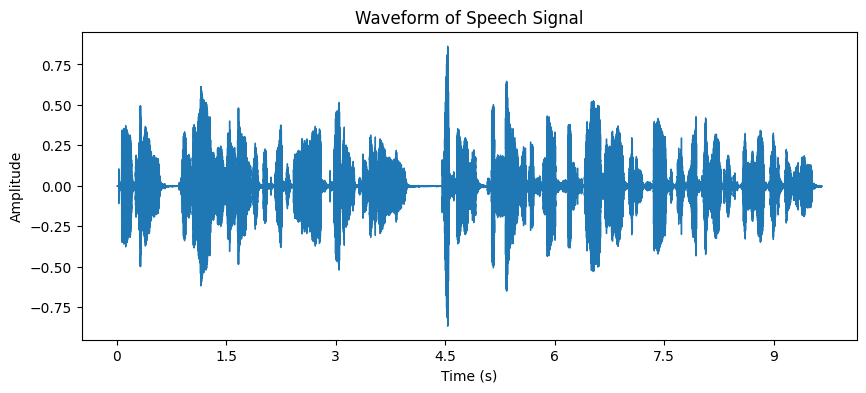

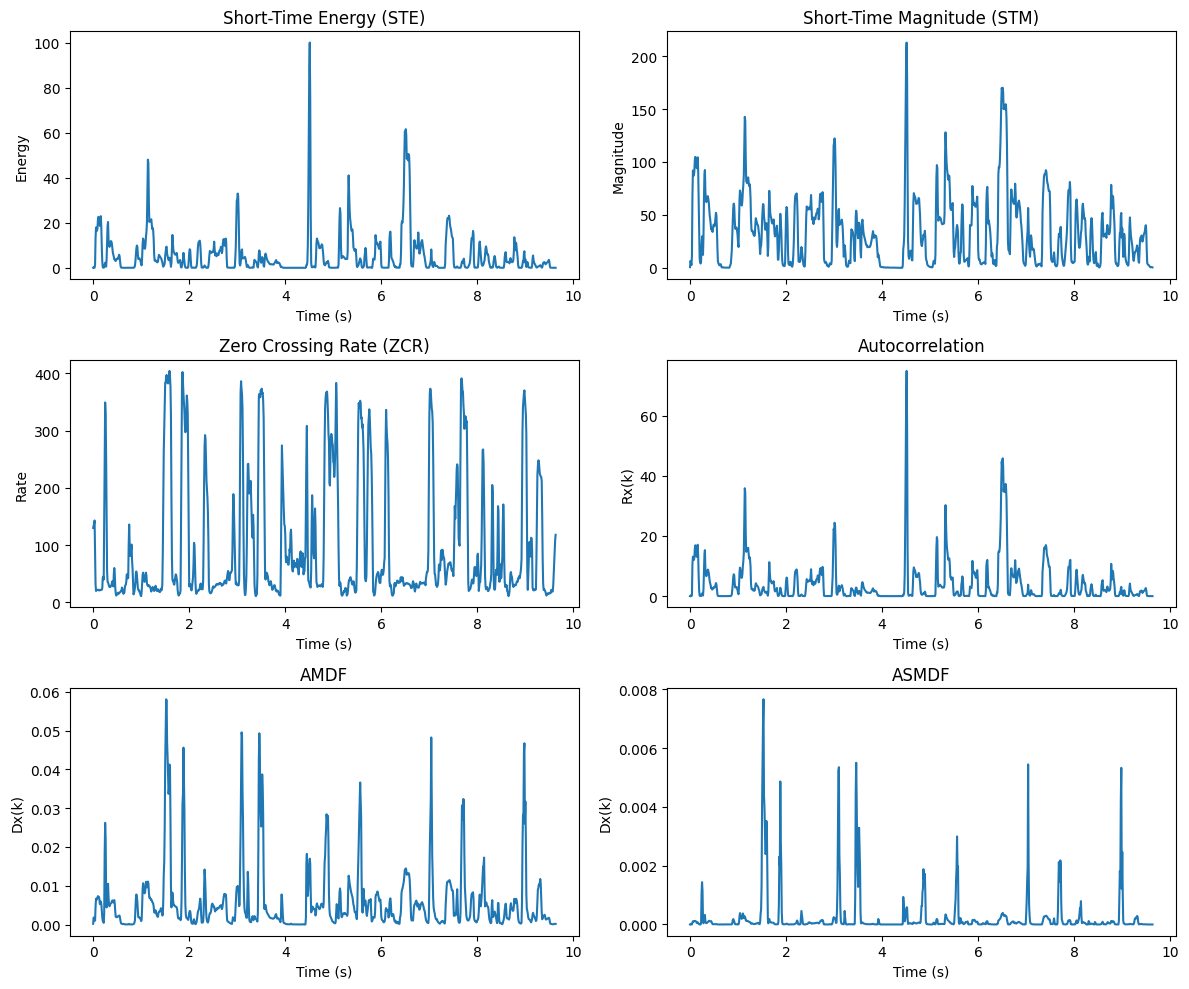

In [5]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

file = '/content/LJ001-0001.wav'
signal, sample_rate = librosa.load(file, sr=44100)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sample_rate)
plt.title("Waveform of Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Feature extraction functions with Hamming window
def STE(x, N):
    w = np.hamming(N)
    return np.sum((x[:N] ** 2) * w)

def STM(x, N):
    w = np.hamming(N)
    return np.sum(np.abs(x[:N] * w))

def ZCR(x, N):
    w = np.hamming(N)
    x_windowed = x[:N] * w
    sign_x = np.sign(x_windowed)
    diff = np.abs(sign_x[1:] - sign_x[:-1])
    return 0.5 * np.sum(diff)

def autocorrelation(x, N, k):
    w = np.hamming(N)
    x_windowed = x[:N] * w
    return np.sum(x_windowed[:N-k] * x_windowed[k:N])

def AMDF(x, N, k):
    w = np.hamming(N)
    x_windowed = x[:N] * w
    return (1/N) * np.sum(np.abs(x_windowed[:N-k] - x_windowed[k:N]))

def ASMDF(x, N, k):
    w = np.hamming(N)
    x_windowed = x[:N] * w
    return (1/N) * np.sum((x_windowed[:N-k] - x_windowed[k:N])**2)

# Function to compute features frame-wise
def extract_features(signal, sample_rate, frame_length=0.025, frame_step=0.01):
    N = int(frame_length * sample_rate)
    step = int(frame_step * sample_rate)
    num_frames = (len(signal) - N) // step + 1

    ste, stm, zcr, autocorr, amdf, asmdf = [], [], [], [], [], []

    for i in range(num_frames):
        frame = signal[i * step : i * step + N]
        ste.append(STE(frame, N))
        stm.append(STM(frame, N))
        zcr.append(ZCR(frame, N))
        autocorr.append(autocorrelation(frame, N, k=1))
        amdf.append(AMDF(frame, N, k=1))
        asmdf.append(ASMDF(frame, N, k=1))

    return {
        "STE": ste,
        "STM": stm,
        "ZCR": zcr,
        "Autocorrelation": autocorr,
        "AMDF": amdf,
        "ASMDF": asmdf,
        "time_axis": np.arange(len(ste)) * frame_step,
    }
features = extract_features(signal, sample_rate)

# Plot all features
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.plot(features["time_axis"], features["STE"])
plt.title("Short-Time Energy (STE)")
plt.xlabel("Time (s)"); plt.ylabel("Energy")

plt.subplot(3, 2, 2)
plt.plot(features["time_axis"], features["STM"])
plt.title("Short-Time Magnitude (STM)")
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")

plt.subplot(3, 2, 3)
plt.plot(features["time_axis"], features["ZCR"])
plt.title("Zero Crossing Rate (ZCR)")
plt.xlabel("Time (s)")
plt.ylabel("Rate")

plt.subplot(3, 2, 4)
plt.plot(features["time_axis"], features["Autocorrelation"])
plt.title("Autocorrelation")
plt.xlabel("Time (s)")
plt.ylabel("Rx(k)")

plt.subplot(3, 2, 5)
plt.plot(features["time_axis"], features["AMDF"])
plt.title("AMDF")
plt.xlabel("Time (s)")
plt.ylabel("Dx(k)")

plt.subplot(3, 2, 6)
plt.plot(features["time_axis"], features["ASMDF"])
plt.title("ASMDF")
plt.xlabel("Time (s)")
plt.ylabel("Dx(k)")

plt.tight_layout()
plt.show()